# <span style="color: #26B260"> ***NOTEBOOK SUR LA REALISATION D'UNE ETUDE DE SANTE PUBLIQUE***

In [1]:
# Ici j'importe mes librairies afin de traiter toutes mes données 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import scipy as sc
import seaborn as sns

# <span style="color:blue"> **Partie 1: Visualisation et nettoyage des données brutes**

Visualisation et nettoyage du fichier aide alimentaire 

In [2]:
# Import du fichier "aide alimentaire"
aide = pd.read_csv('aide_alimentaire.csv')
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [3]:
# description du fichier "aide alimentaire"
aide.describe()

,Année,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


In [4]:
# Modification du nom des colonnes et mise à l'unité
aide.rename(columns = {'Pays bénéficiaire' : 'Pays' , 'Année' : 'Annee' , 'Produit' : 'Produit' , 'Valeur' : 'Valeur'}, inplace=True)
aide['Valeur'] = aide['Valeur'] * 1000
aide.head()

,Pays,Annee,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


Nettoyage du fichier population

In [5]:
# Import du fichier
pop = pd.read_csv('population.csv')
pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
# description du fichier "population" 
pop.describe()
print(pop)

             Zone  Année     Valeur
0     Afghanistan   2013  32269.589
1     Afghanistan   2014  33370.794
2     Afghanistan   2015  34413.603
3     Afghanistan   2016  35383.032
4     Afghanistan   2017  36296.113
...           ...    ...        ...
1411     Zimbabwe   2014  13586.707
1412     Zimbabwe   2015  13814.629
1413     Zimbabwe   2016  14030.331
1414     Zimbabwe   2017  14236.595
1415     Zimbabwe   2018  14438.802

[1416 rows x 3 columns]


In [7]:
# Modification du nom des colonnes et mise à l'unité
pop.rename(columns = {'Zone' : 'Pays' , 'Année' : 'Annee'  , 'Valeur' : 'Population'}, inplace=True)
pop['Population'] = pop['Population'] * 1000
pop.head()

,Pays,Annee,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


Nettoyage du fichier Disponibilité alimentaire

In [8]:
# Import du fichier "disponibilité alimentaire"
dispo = pd.read_csv('dispo_alimentaire.csv')
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# description du fichier "disponobilité alimentaire"
dispo.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [10]:
# Vérification des NA
dispo.notna().describe()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605
unique,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,True,True,True,False,False,True,True,True,True,True,True,True,True,False,True,False,False,False
freq,15605,15605,15605,12885,10109,14241,14015,11794,11561,15382,12226,14852,14015,11327,9180,13514,13313,8829


In [11]:
# Modification du nom des colonnes,  et mise à l'unité.
dispo.rename(columns = {'Zone': 'Pays', 'Disponibilité alimentaire (Kcal/personne/jour)' : 'Disponibilite alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)' : 'Disponibilite alimentaire en quantite (kg/personne/an)' , 'Disponibilité de matière grasse en quantité (g/personne/jour)' : 'Disponibilite de matiere grasse en quantite (g/personne/jour)' , 'Disponibilité de protéines en quantité (g/personne/jour)' : 'Disponibilite de proteines en quantite (g/personne/jour)' , 'Disponibilité intérieure' : 'Disponibilite interieure', 'Exportations - Quantité' : 'Exportations - Quantite', 'Importations - Quantité' : 'Importations - Quantite' }, 
             inplace=True)

dispo.fillna(0, inplace=True)

unit_col = ['Aliments pour animaux', 'Autres Utilisations','Disponibilite interieure','Exportations - Quantite', 'Importations - Quantite', 'Nourriture' , 'Pertes', 'Production', 'Semences', 'Traitement','Variation de stock']
for colonne in unit_col:dispo[colonne] = dispo[colonne]*1000000
    
dispo.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


Nettoyage du fichier "sous nutrition"

In [12]:
# Import du fichier "sous nutrition"
sn = pd.read_csv('sous_nutrition.csv')
sn.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [13]:
# description du fichier "sous nutrition" et remplacement des NAN par 0
sn.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,République populaire démocratique de Corée,2013-2015,<0.1
freq,6,203,120


In [14]:
# Modification du nom des colonnes, remplacement des valeurs < 0.1  et mise à l'unité.

sn.rename(columns = {'Zone' : 'Pays' , 'Année' : 'Annee' , 'Valeur' : 'Valeur'},inplace=True)

sn = sn.replace('<0.1', 0)

sn["Valeur"]= sn["Valeur"].astype(float)
sn['Valeur'] = sn['Valeur']*1000000
sn.head()

,Pays,Annee,Valeur
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


# <span style="color:blue">**Partie 2: Réponses aux questions de Marc**</span>

Vérification de l'équation de Julien 

Disponibilité intérieure = Production+ importation- exportation + variation de stock

Disponibilité intérieure = Nouriture + aliments pour animaux + autres utilisations + pertes +semences + traitement

In [15]:
# Exemple du calcul avec bananes d'Afghanistan
dispo_int_afgha = dispo.loc[dispo['Pays']=='Afghanistan']
dispo_int_afgha_bananes = dispo_int_afgha.loc[dispo_int_afgha['Produit']=='Bananes']
#dispo_int_afgha_bananes
dispo_int_afgha_bananes['Production']+ dispo_int_afgha_bananes['Importations - Quantite']-dispo_int_afgha_bananes['Exportations - Quantite']+dispo_int_afgha_bananes['Variation de stock']

4    82000000.0
dtype: float64

In [16]:
dispo_int_afgha_bananes['Nourriture']+ dispo_int_afgha_bananes['Aliments pour animaux']+dispo_int_afgha_bananes['Autres Utilisations']+dispo_int_afgha_bananes['Pertes']+ dispo_int_afgha_bananes['Semences']+dispo_int_afgha_bananes['Traitement']

4    82000000.0
dtype: float64

In [17]:
dispo_int_afgha_bananes['Disponibilite interieure']

4    82000000.0
Name: Disponibilite interieure, dtype: float64

<span style="color:blue">Question 1 : la proportion de personnes en état de sous-nutrition  2017

In [18]:
# Total de la population mondiale en 2017
pop2017 = pop.loc[pop['Annee']==2017]
Total_pop2017= pop2017['Population'].sum()
Total_pop2017

7548134111.0

In [19]:
# Total de la  population sous nutrie en 2017
sn2017 = sn.loc[sn['Annee']=='2016-2018']
Total_sn2017=sn2017['Valeur'].sum()
Total_sn2017

535700000.0

In [20]:
# Calcul de la proportion de la population sous-nutrie en 2017
Proportion_pop_sn_2017 = Total_sn2017/Total_pop2017*100
Proportion_pop_sn_2017

7.097118203283073

<span style="color:blue">Question 2: Nombre de personnes pouvant être nourries à partir de la dispo alimentaire mondiale

In [21]:
# Calcul de la disponibilité alimentaire mondiale en 2017
dispo2017= dispo.merge(pop.loc[pop['Annee']==2017, ['Annee','Pays','Population']], on='Pays')
dispo2017                              

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Annee,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,2017,636039.0
15412,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15413,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0


In [22]:
dispo_alim_mondiale= dispo2017['Disponibilite alimentaire (Kcal/personne/jour)']*dispo2017['Population']*365
print('La disponibilité alimentaire mondiale en kcal, est de:', dispo_alim_mondiale.sum())

La disponibilité alimentaire mondiale en kcal, est de: 7635429388975815.0


In [23]:
# Calcul des personnes pouvant être nourries à partir de la disponibilité mondiale
# D'après le FAO une personne devrait consommer en moyenne 2150KCAL/jour soit : 2150*365 en 1 an.
print('Le nombre de personnes pouvant être nourries:',dispo_alim_mondiale.sum()/(2150*365))
print('La proportion de personnes pouvant être nourries:',(dispo_alim_mondiale.sum()/(2150*365))*100/ pop2017['Population'].sum(),'%')

Le nombre de personnes pouvant être nourries: 9729760291.78186
La proportion de personnes pouvant être nourries: 128.90285398615993 %


<span style="color:blue">Question 3: Nombre de personnes pouvant être nourries à partir de la dispo disponibilité alimentaire des produits végétaux

In [24]:
# Calcul de la disponibilité mondiale des produits végétaux en 2017
dispo2017_vegetaux=dispo2017.loc[dispo2017['Origine']=='vegetale']
dispo2017_vegetaux

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Annee,Population
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15407,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15408,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0


In [25]:
dispo_vegetaux_mondiale= dispo2017_vegetaux['Disponibilite alimentaire (Kcal/personne/jour)']*dispo2017_vegetaux['Population']*365
print('La disponibilité vegetale mondiale en kcal, est de:', dispo_vegetaux_mondiale.sum())

La disponibilité vegetale mondiale en kcal, est de: 6300178937197865.0


In [26]:
# personnes pouvant être nourries à partir de la disponibilité végétale
# une personne consomme en moyenne 2150KCAL/jour soit : 2150*365 en 1 an, voyons ce que cela représente
print('Le nombre de personnes pouvant être nourries:',dispo_vegetaux_mondiale.sum()/(2150*365))
print('La proportion de personnes pouvant être nourries:',(dispo_vegetaux_mondiale.sum()/(2150*365))*100/ pop2017['Population'].sum(),'%')

Le nombre de personnes pouvant être nourries: 8028262423.953954
La proportion de personnes pouvant être nourries: 106.36088741791507 %


<span style="color:blue">Question 4: Utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

In [27]:
# Calcul de la disponibilité intérieure mondiale
disponibilite_int=dispo2017['Disponibilite interieure'].sum()
print('La disponibilite interieure mondiale est de:',disponibilite_int)

La disponibilite interieure mondiale est de: 9733927000000.0


In [28]:
# Calcul de la part attribuée à la Nourriture 
nourriture=dispo2017['Nourriture'].sum()
part_nourriture=nourriture/disponibilite_int*100
print('La part attribuée à la Nourriture est de:',round(part_nourriture,2),'%')

La part attribuée à la Nourriture est de: 49.37 %


In [29]:
# Calcul de la part attribuée aux aliments pour Animaux
animaux=dispo2017['Aliments pour animaux'].sum()
part_animaux=animaux/disponibilite_int*100
print('La part attribuée aux animaux est de:',round(part_animaux,2),'%')

La part attribuée aux animaux est de: 13.23 %


In [30]:
# Calcul de la part attribuée aux autres utilisations
autres_utilisations=dispo2017['Autres Utilisations'].sum()
part_autres_utilisations=autres_utilisations/disponibilite_int*100
print('La part attribuée aux autres utilisations est de:',round(part_autres_utilisations,2),'%')

La part attribuée aux autres utilisations est de: 8.82 %


In [31]:
# Calcul de la proportion des pertes
pertes=dispo2017['Pertes'].sum()
part_pertes=pertes/disponibilite_int*100
print('La part attribuée aux pertes est de:',round(part_pertes,2),'%')

La part attribuée aux pertes est de: 4.65 %


In [32]:
# Calcul de la part attribuée aux semences
semences=dispo2017['Semences'].sum()
part_semences=semences/disponibilite_int*100
print('La part attribuée aux semences est de:',round(part_semences,2),'%')

La part attribuée aux semences est de: 1.58 %


In [33]:
# Calcul de la part attribuée aux traitement
traitement=dispo2017['Traitement'].sum()
part_traitement=traitement/disponibilite_int*100
print('La part attribuée au traitement est de:',round(part_traitement,2),'%')

La part attribuée au traitement est de: 22.45 %


In [34]:
# Visualisation des données à l'aide d'un tableau
table_utilisation=pd.DataFrame({'Utilisation':['nourriture','traitement', 'animaux', 'autres_utilisation', 'pertes', 'semences'],'pourcentage':['49.3','22.4', '13.2', '8.8', '4.6', '1.6']})
table_utilisation

,Utilisation,pourcentage
0,nourriture,49.3
1,traitement,22.4
2,animaux,13.2
3,autres_utilisation,8.8
4,pertes,4.6
5,semences,1.6


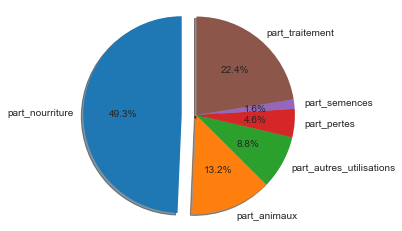

In [35]:
# Visualistion des résultats à l'aide d'un diagramme circulaire
name = ["part_nourriture", "part_animaux", "part_autres_utilisations", "part_pertes", "part_semences","part_traitement"]
data = [49.36, 13.23, 8.82, 4.64, 1.57, 22.45]
explode=(0.15, 0, 0, 0, 0, 0)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

# <span style="color:blue">**Partie 3: Réponses aux questions de Mélanie**</span>

<span style="color:blue"> Question1: Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [36]:
#  Calcul de la proportion par pays, via une jointure 'merge'
sn_pop_2017_2= sn2017.merge(pop.loc[pop['Annee']==2017, ['Pays','Population']], on='Pays')
sn_pop_2017_2.head()

,Pays,Annee,Valeur,Population
0,Afghanistan,2016-2018,10500000.0,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,57009756.0
2,Albanie,2016-2018,100000.0,2884169.0
3,Algérie,2016-2018,1300000.0,41389189.0
4,Allemagne,2016-2018,NaN,82658409.0


In [37]:
# Liste des 10 pays ou la proportion de personnes sous-alimentées est la plus forte
sn_pop_2017_2['prop'] = sn_pop_2017_2['Valeur']/sn_pop_2017_2['Population']
sn_pop_2017_2.head()
sn_pop_2017_20=sn_pop_2017_2[['Pays','prop']].sort_values(by='prop',ascending=False).iloc[:10]
sn_pop_2017_20

,Pays,prop
78,Haïti,0.482592
157,République populaire démocratique de Corée,0.471887
108,Madagascar,0.410629
103,Libéria,0.382797
100,Lesotho,0.382494
183,Tchad,0.379576
161,Rwanda,0.350556
121,Mozambique,0.328109
186,Timor-Leste,0.321735
0,Afghanistan,0.289287


<AxesSubplot:xlabel='Pays'>

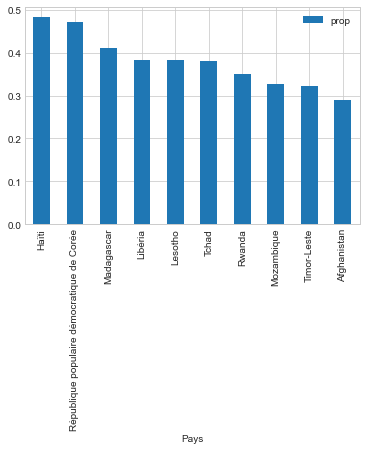

In [38]:
# Visualisation avec un histogramme
sn_pop_2017_20.plot.bar(x='Pays', y='prop')

<span style="color:blue">Question 2: Les Pays qui ont le plus bénéficiés d’aide depuis 2013

In [39]:
pays_les_plus_aides = aide[['Pays','Valeur']].groupby('Pays').sum()
pays_les_plus_aides.sort_values(by='Valeur', ascending=False).head(10)

,Valeur
Pays,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<span style="color:blue">Question 3: Les Pays ayant le moins de disponibilité alimentaire par habitants

In [40]:
pays_avec_le_moins_de_dispo = dispo2017[['Pays','Disponibilite alimentaire (Kcal/personne/jour)']].groupby('Pays').sum()
pays_avec_le_moins_de_dispo.sort_values(by='Disponibilite alimentaire (Kcal/personne/jour)', ascending=True).head(10)

,Disponibilite alimentaire (Kcal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


<span style="color:blue">Question 4: Ceux ayant le plus de disponibilité alimentaire par habitants

In [41]:
pays_avec_le_plus_de_dispo = dispo2017[['Pays','Disponibilite alimentaire (Kcal/personne/jour)']].groupby('Pays').sum()
pays_avec_le_plus_de_dispo.sort_values(by='Disponibilite alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Disponibilite alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


# <span style="color:blue">**Partie 4: Recherches relatives à l'utilisation des céréales**</span>

In [42]:
#Importation du fichier csv "cereales' à partir des données FAO
cereales = pd.read_csv('cereales_2017.csv')
#On veut savoir quels sont les produits répertoriés comme des céréales, pour cela on utilise la fonction 'unique'
#Cette fonction récupère toutes les valeurs uniques dans le tableau NumPy donné et trie ces valeurs uniques.
cereales['Produit'].unique()

array(['Bl? et produits', 'Riz et produits', 'Orge et produits',
       'Ma?s et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'C?r?ales, Autres'],
      dtype=object)

In [43]:
cereals_list = ['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Mais et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres']

#Création d'une table ne contenant que les informations des céréales
cereals = dispo2017.loc[dispo2017['Produit'].isin(cereals_list),:] 
cereals

print("Proportion d'alimentation animale :", "{:.2f}".format(cereals['Aliments pour animaux'].sum()*100/cereals['Disponibilite interieure'].sum()), "%")
print("Proportion d'alimentation humaine :", "{:.2f}".format(cereals['Nourriture'].sum()*100/cereals['Disponibilite interieure'].sum()), "%")

Proportion d'alimentation animale : 69.67 %
Proportion d'alimentation humaine : 17.63 %


In [44]:
cereals

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Annee,Population
12,Afghanistan,"Céréales, Autres",vegetale,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,2017,36296113.0
67,Afrique du Sud,Avoine,vegetale,8.000000e+06,0.0,5.0,0.75,0.09,0.16,4.900000e+07,4000000.0,2.500000e+07,4.000000e+07,1000000.0,2.800000e+07,1000000.0,0.0,0.000000e+00,2017,57009756.0
81,Afrique du Sud,"Céréales, Autres",vegetale,8.000000e+06,0.0,1.0,0.07,0.00,0.02,1.200000e+07,10000000.0,3.000000e+06,4.000000e+06,0.0,1.900000e+07,0.0,0.0,0.000000e+00,2017,57009756.0
162,Albanie,Avoine,vegetale,2.500000e+07,0.0,1.0,0.13,0.01,0.03,2.800000e+07,0.0,1.000000e+06,0.000000e+00,1000000.0,2.700000e+07,1000000.0,0.0,0.000000e+00,2017,2884169.0
176,Albanie,"Céréales, Autres",vegetale,0.000000e+00,0.0,0.0,0.08,0.00,0.01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,2017,2884169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15158,États-Unis d'Amérique,Avoine,vegetale,1.430000e+09,0.0,19.0,3.95,0.31,0.79,2.797000e+09,102000000.0,1.851000e+09,1.265000e+09,0.0,1.016000e+09,103000000.0,0.0,3.200000e+07,2017,325084756.0
15172,États-Unis d'Amérique,"Céréales, Autres",vegetale,7.700000e+07,0.0,5.0,0.62,0.02,0.15,2.710000e+08,91000000.0,2.810000e+08,2.000000e+08,0.0,8.100000e+07,3000000.0,0.0,0.000000e+00,2017,325084756.0
15252,Éthiopie,Avoine,vegetale,0.000000e+00,0.0,4.0,0.61,0.07,0.19,6.000000e+07,0.0,1.000000e+06,5.700000e+07,0.0,6.000000e+07,3000000.0,0.0,0.000000e+00,2017,106399924.0
15265,Éthiopie,"Céréales, Autres",vegetale,0.000000e+00,469000000.0,254.0,26.52,0.77,6.97,3.274000e+09,0.0,2.000000e+06,2.495000e+09,234000000.0,4.672000e+09,76000000.0,0.0,-1.400000e+09,2017,106399924.0


Informations relatives à à Thailande et la gestion du Manioc

In [45]:
sn_thailand = sn_pop_2017_2.loc[sn_pop_2017_2['Pays']=='Thaïlande',:]
#sn_thailand.head()
print("La proportion de la population en sous-nutrition en Thailande est de:", "{:.2f}".format(sn_thailand['prop'].sum()*100), "%")

La proportion de la population en sous-nutrition en Thailande est de: 8.96 %


In [46]:
prop_thailand = dispo2017.loc[(dispo2017['Pays']=='Thaïlande')& (dispo2017['Produit']=='Manioc'),:]
# prop_thailand['Exportations - Quantite']*100/prop_thailand['Production']
print('La proportion liée aux exportations du Manioc correspond à:', "{:.2f}".format(prop_thailand['Exportations - Quantite'].sum()*100/prop_thailand['Production'].sum()), "%")

La proportion liée aux exportations du Manioc correspond à: 83.41 %


In [47]:
prop_thailand


,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Annee,Population
13620,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,2017,69209810.0


Composition du manioc:

Cet aliment renferme une importante quantité de glucides, mais il ne contient pas de gluten. 
Il est aussi riche en amidon, ce qui le rend facilement digestible et très rassasiant.

Les propriétés nutritionnelles du yucca : quelles sont-elles ?
Voici ses valeurs pour 100 grammes :

Calories : 159 kcal.
Il contient également des nutriments et minéraux :

Lipides : 0.3 g.
Sodium : 14 mg.
Potassium : 271 g.
Glucides : 38 g.
Protéines : 1.4 g.
Calcium : 16 mg.
Fer : 0.3 mg.
Magnésium : 21 mg.
Mais aussi de la vitamine B6 : 0.1 mg.